In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

LKB = pd.read_excel (r'C:\Users\HP\Dropbox\Chem UoB\DataDRtechniques.xlsx',
                    sheet_name='LKBPP screen dataset')

descriptors = ['homo', 'lumo', 'pa', 'homo2', 'lumo2', 'pa2', 'he.w.pn', 'nhe', 'be.gla', 'ml.gla', 'dmd.gla', 'd.d1rgla', 'd.d2rgla', 'drd1rgla', 
               'drd2rgla', 'nbo.glaf', 'be.pd', 'ml.pd', 'dmd.pd', 'd.d1r.pd', 'd.d2r.pd', 'd.rd1rpd', 'd.rd2rpd', 'nbo.pd.f', 'dppd.d1', 'dppd.d2', 
               'dpzn.d1', 'dpzn.d2']

In [30]:
# Scale the data
scaler = StandardScaler()
data_std = scaler.fit_transform(LKB[descriptors])

In [37]:
#Definition of each dimensionality reduction technique
pca = PCA(n_components=7).fit_transform(data_std)
pca_df_scale = pd.DataFrame(pca, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7'])

tsne = TSNE(n_components=10, verbose=0, perplexity=12, n_iter=5000, learning_rate="auto", method='exact', random_state=42).fit_transform(data_std)
tsne_df_scale = pd.DataFrame(tsne, columns=['tsne1', 'tsne2', 'tsne3','tsne4', 'tsne5', 'tsne6', 'tsne7', 'tsne8', 'tsne9', 'tsne10'])

umap_5 = umap.UMAP(n_neighbors=5,min_dist=0.5,n_components=10,random_state=42).fit_transform(data_std)
umap_df_scale_5 = pd.DataFrame(umap_5, columns=['umap1', 'umap2', 'umap3', 'umap4', 'umap5', 'umap6', 'umap7', 'umap8', 'umap9', 'umap10'])

umap_10 = umap.UMAP(n_neighbors=10,min_dist=0.5,n_components=10,random_state=42).fit_transform(data_std)
umap_df_scale_10 = pd.DataFrame(umap_10, columns=['umap1', 'umap2', 'umap3', 'umap4', 'umap5', 'umap6', 'umap7', 'umap8', 'umap9', 'umap10'])

umap_15 = umap.UMAP(n_neighbors=15,min_dist=0.5,n_components=10,random_state=42).fit_transform(data_std)
umap_df_scale_15 = pd.DataFrame(umap_15, columns=['umap1', 'umap2', 'umap3', 'umap4', 'umap5', 'umap6', 'umap7', 'umap8', 'umap9', 'umap10'])

In [31]:
#Choose the DR reduction technique to perform the regression model:
X=pca_df_scale

In [32]:
y=LKB['Substitution energy']

In [33]:
for n in (0, 1, 2, 3 ,4, 5, 6, 7, 8, 9):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=n)
    linreg=LinearRegression()
    linreg.fit(x_train,y_train)
    y_pred=linreg.predict(x_test)
    R2=r2_score(y_test,y_pred)
    print("%.2f" %R2)

0.85
0.81
0.87
0.84
0.82
0.86
0.88
0.86
0.80
0.76


In [34]:
#For obtainig the plot of the regression one by one: 

#Set a radom state:
n=6

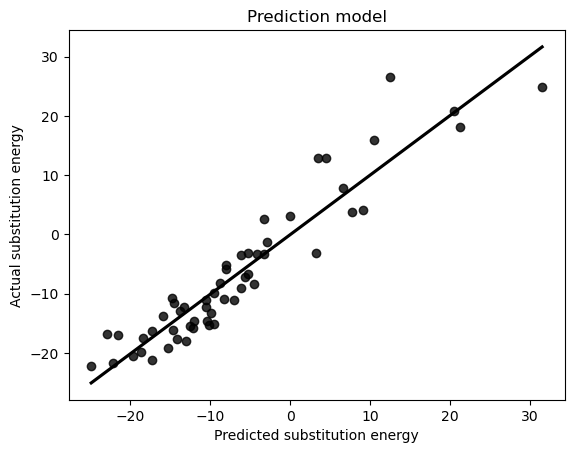

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=n)
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)

sns.regplot(y=y_test,x=y_pred,ci=None,color ='black').set(title='Prediction model');
plt.ylabel('Actual substitution energy');
plt.xlabel('Predicted substitution energy');

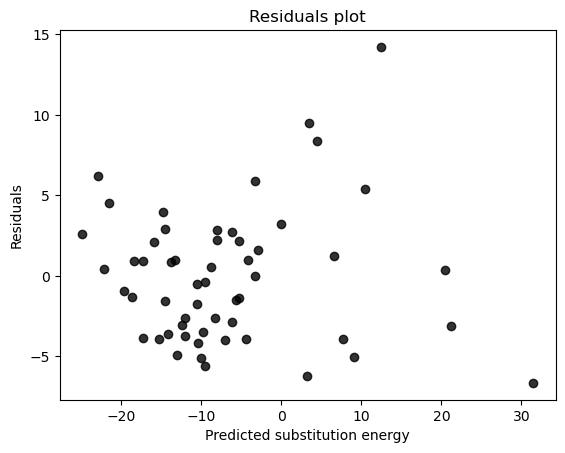

In [36]:
#For obtaining the residuals plot: 

residuals = y_test-y_pred

sns.regplot(y=residuals,x=y_pred,ci=None,color ='black', fit_reg=False).set(title='Residuals plot');
plt.ylabel('Residuals');
plt.xlabel('Predicted substitution energy');

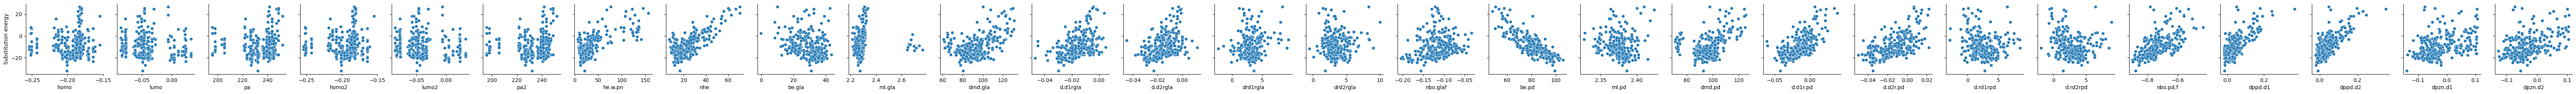

In [38]:
#Pairplot code for obtaining the correlation between one feature and each descriptor.
sns.pairplot(data=LKB, y_vars=['Substitution energy'], x_vars=descriptors)
